In [1]:
%load_ext autoreload
%autoreload 2

In [15]:
from os.path import join
import json
import h5py
import pprint
import numpy as np
from collections import defaultdict
import matplotlib.pyplot as plt
from tqdm import tqdm

from utils.io import load_json

In [7]:
# set data root
data_root = "/ssd/pbagad/datasets/HowTo100M/"

# load annotations
annotations = load_json(join(data_root, "caption.json"))

In [8]:
len(annotations)

1238911

In [9]:
type(annotations)

dict

In [11]:
list(annotations.keys())[:10]

['nVbIUDjzWY4',
 'CTPAZ2euJ2Q',
 'rwmt7Cbuvfs',
 'HnTLh99gcxY',
 'EyP3HVhg1u0',
 'w6zbbdK1ewY',
 'RAidUDTPZ-k',
 'nssig0FNZVU',
 'm2YyhYyleII',
 'u5B1RAufWVM']

In [12]:
sample_video = "nVbIUDjzWY4"

In [16]:
captions = []

for key in tqdm(annotations, desc="Processing items"):
    captions.extend(annotations[key]["text"])

Processing items: 100%|███████████████████████████████████████████████████████| 1238911/1238911 [00:06<00:00, 183265.66it/s]


In [17]:
len(captions)

138429929

### Check temporal captions

In [18]:
# define some temporal prepositions
temporal_prepositions = ["after", "before", "then", "while", "during", "as soon as"]


def check_in_caption(caption, keywords):
    """Checks if any of the given keywords occur in the caption."""
    caption = caption.lower()
    for word in keywords:
        if word.lower() in caption:
            return True
    return False

In [22]:
captions = [x for x in tqdm(captions, desc="Filtering captions") if isinstance(x, str)]

In [24]:
# find captions with temporal prepositions
temporal_captions = [
    x for x in tqdm(captions, "Getting temporal captions") if check_in_caption(x, temporal_prepositions)
]

Getting temporal captions: 100%|██████████████████████████████████████████| 138429877/138429877 [02:50<00:00, 812164.23it/s]


In [25]:
temporal_captions_split = defaultdict(list)

for x in tqdm(temporal_captions, "Splitting temporal captions"):
    for word in temporal_prepositions:
        if word in x:
            temporal_captions_split[word].append(x)

Splitting temporal captions: 100%|██████████████████████████████████████████████| 134841/134841 [00:00<00:00, 459400.76it/s]


In [26]:
len(temporal_captions_split["after"])

78477

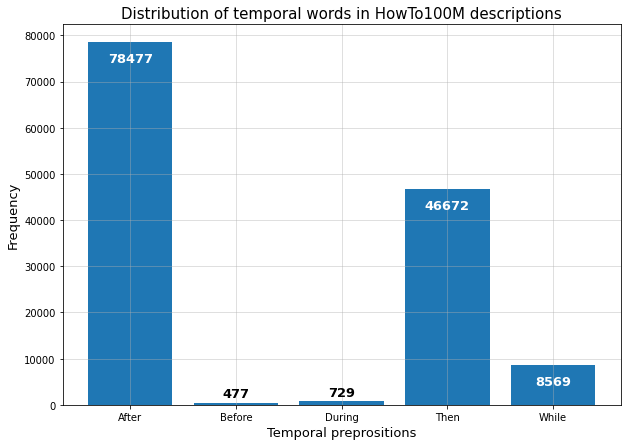

In [28]:
fig, ax = plt.subplots(1, 1, figsize=(10, 7))

counts = [len(temporal_captions_split[k]) for k in temporal_captions_split]
keys = [k.capitalize() for k in temporal_captions_split]

indices = np.argsort(keys)
counts = np.array(counts)[indices]
keys = np.array(keys)[indices]

ax.grid(alpha=0.5)
ax.bar(keys, counts)
ax.set_title("Distribution of temporal words in HowTo100M descriptions", fontsize=15)
ax.set_xlabel("Temporal preprositions", fontsize=13)
ax.set_ylabel("Frequency", fontsize=13)

rects = ax.patches
for rect, count in zip(rects, counts):
    height = rect.get_height()
    
    if count > 1000:
        new_height = height - 5000
        color="white"
    else:
        new_height = height + 500
        color="black"
    
    ax.text(
        rect.get_x() + rect.get_width() / 2, new_height,
        count, ha="center", va="bottom", fontsize=13, color=color, weight='bold',
    )

plt.show()